EDA of the DATASET

In [68]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading the data
data=pd.read_excel("airlines_data.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
# information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
# description of the data
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
# finding the null values in the data set
data.isnull().sum()
# filling the null values with the use of fillna() and method as the attribute= ffill fills the last observed non-null value forward until another non-null value is encountered.
data=data.fillna(method='ffill') 
data
# print(data.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [21]:
# finding all the names of the Airlines to check if there are any repetition with different names
print("Before combining\n")
airline=data['Airline'].unique().tolist()
airline.sort()
print(airline)

# combining the data under the same name like Jet Airways and  Jet Airways Business as Jet Airways
data['Airline'] = np.where(data['Airline']=='Vistara Premium economy', 'Vistara', data['Airline'])
data['Airline'] = np.where(data['Airline']=='Jet Airways Business', 'Jet Airways', data['Airline'])
data['Airline'] = np.where(data['Airline']== 'Multiple carriers Premium economy','Multiple carriers', data['Airline'])

print("\nAfter Combining\n")
airline=data['Airline'].unique().tolist()
airline.sort()
print(airline)

Before combining

['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara']

After Combining

['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Multiple carriers', 'SpiceJet', 'Trujet', 'Vistara']


In [29]:
# conerting the categorical variable to numeric valuesusing get_dummies()
# Using One Hot Encoding 
data_u=pd.get_dummies(data=data,columns=['Airline','Source','Destination'])
data_u.shape
# data.shape

(10683, 11)

In [34]:
# value_counts() to determine the values distribution of the 'Total_Stops' parameter
data_u['Total_Stops'].value_counts()
# data_u['Additional_Info'].value_counts()

Total_Stops
1 stop      5625
non-stop    3492
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [50]:
# To make the Number of stops from non stop to 0 1 stop to 1 and so on
# using Lable encoding
data_u=data_u.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3, '4 stops':4})
data_u

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,False,False,False,False,False,False,True,120,50,170
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,False,True,False,False,False,False,False,420,25,445
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,False,False,True,False,False,False,False,1140,0,1140
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,False,True,False,False,False,False,False,300,25,325
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,False,False,False,False,False,False,True,240,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9/04/2019,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,True,False,...,False,True,False,False,False,False,False,120,30,150
10679,27/04/2019,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,False,True,...,False,True,False,False,False,False,False,120,35,155
10680,27/04/2019,BLR → DEL,08:20,11:20,3h,0,No info,7229,False,False,...,False,False,False,True,False,False,False,180,0,180
10681,01/03/2019,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,False,False,...,False,False,False,False,False,False,True,120,40,160


Data Time Transformation

In [51]:
# print(data_u.head())
duration = list(data_u['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
dur_hours = []
dur_minutes = []  
 
for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
data_u['Duration_hours'] = dur_hours
data_u['Duration_minutes'] =dur_minutes
data_u.loc[:,'Duration_hours'] *= 60
data_u['Duration_Total_mins']= data_u['Duration_hours']+data_u['Duration_minutes']
data_u

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,False,False,False,False,False,False,True,120,50,170
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,False,True,False,False,False,False,False,420,25,445
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,False,False,True,False,False,False,False,1140,0,1140
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,False,True,False,False,False,False,False,300,25,325
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,False,False,False,False,False,False,True,240,45,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9/04/2019,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,True,False,...,False,True,False,False,False,False,False,120,30,150
10679,27/04/2019,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,False,True,...,False,True,False,False,False,False,False,120,35,155
10680,27/04/2019,BLR → DEL,08:20,11:20,3h,0,No info,7229,False,False,...,False,False,False,True,False,False,False,180,0,180
10681,01/03/2019,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,False,False,...,False,False,False,False,False,False,True,120,40,160


In [57]:
# Transforming the 'Departure' and 'Arrival' Time Columns

data_u["Dep_Hour"]=pd.to_datetime(data_u['Dep_Time']).dt.hour
data_u["Dep_Min"]=pd.to_datetime(data_u['Dep_Time']).dt.minute
data_u
data_u["Arr_Hour"]=pd.to_datetime(data_u['Arrival_Time']).dt.hour
data_u["Arr_Min"]=pd.to_datetime(data_u['Arrival_Time']).dt.minute
data_u

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20628\2573717789.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_u["Dep_Hour"]=pd.to_datetime(data_u['Dep_Time']).dt.hour
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20628\2573717789.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_u["Dep_Min"]=pd.to_datetime(data_u['Dep_Time']).dt.minute
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20628\2573717789.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_u["Arr_Hour"]=pd.to_datetime(data_u['Arrival_Time']).dt.hour
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,False,False,True,120,50,170,22,20,1,10
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,False,False,False,420,25,445,5,50,13,15
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,False,False,False,1140,0,1140,9,25,4,25
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,False,False,False,300,25,325,18,5,23,30
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,False,False,True,240,45,285,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9/04/2019,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,True,False,...,False,False,False,120,30,150,19,55,22,25
10679,27/04/2019,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,False,True,...,False,False,False,120,35,155,20,45,23,20
10680,27/04/2019,BLR → DEL,08:20,11:20,3h,0,No info,7229,False,False,...,False,False,False,180,0,180,8,20,11,20
10681,01/03/2019,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,False,False,...,False,False,True,120,40,160,11,30,14,10


In [60]:
# Splitting "Department/Arrival_Time"
data_u['dep_timeZone']=pd.cut(data_u.Dep_Hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
data_u['arr_timeZone']=pd.cut(data_u.Arr_Hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
data_u

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,dep_timeZone,arr_timeZone
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,True,120,50,170,22,20,1,10,Evening,Night
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,False,420,25,445,5,50,13,15,Night,Afternoon
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,False,1140,0,1140,9,25,4,25,Morning,Night
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,False,300,25,325,18,5,23,30,Afternoon,Evening
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,True,240,45,285,16,50,21,35,Afternoon,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9/04/2019,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,True,False,...,False,120,30,150,19,55,22,25,Evening,Evening
10679,27/04/2019,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,False,True,...,False,120,35,155,20,45,23,20,Evening,Evening
10680,27/04/2019,BLR → DEL,08:20,11:20,3h,0,No info,7229,False,False,...,False,180,0,180,8,20,11,20,Morning,Morning
10681,01/03/2019,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,False,False,...,True,120,40,160,11,30,14,10,Morning,Afternoon


In [65]:
# Transforming the Date of Journey
data_u['Day']=pd.to_datetime(data_u['Date_of_Journey'],format="%d/%m/%Y").dt.day
data_u['Month']=pd.to_datetime(data_u['Date_of_Journey'],format="%d/%m/%Y").dt.month
data_u['Year']=pd.to_datetime(data_u['Date_of_Journey'],format="%d/%m/%Y").dt.year
data_u

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Duration_Total_mins,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,dep_timeZone,arr_timeZone,Month,Day,Year
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,170,22,20,1,10,Evening,Night,3,24,2019
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,445,5,50,13,15,Night,Afternoon,5,1,2019
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,1140,9,25,4,25,Morning,Night,6,9,2019
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,325,18,5,23,30,Afternoon,Evening,5,12,2019
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,285,16,50,21,35,Afternoon,Evening,3,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,9/04/2019,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,True,False,...,150,19,55,22,25,Evening,Evening,4,9,2019
10679,27/04/2019,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,False,True,...,155,20,45,23,20,Evening,Evening,4,27,2019
10680,27/04/2019,BLR → DEL,08:20,11:20,3h,0,No info,7229,False,False,...,180,8,20,11,20,Morning,Morning,4,27,2019
10681,01/03/2019,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,False,False,...,160,11,30,14,10,Morning,Afternoon,3,1,2019


In [71]:
# Determining the day of the week
data_u['day_of_week']=pd.to_datetime(data_u['Date_of_Journey']).dt.day_name()
data_u.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20628\2803326123.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_u['day_of_week']=pd.to_datetime(data_u['Date_of_Journey']).dt.day_name()


,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,dep_timeZone,arr_timeZone,Month,Day,Year,day_of_week
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,22,20,1,10,Evening,Night,3,24,2019,Sunday
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,5,50,13,15,Night,Afternoon,5,1,2019,Wednesday
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,9,25,4,25,Morning,Night,6,9,2019,Sunday
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,18,5,23,30,Afternoon,Evening,5,12,2019,Sunday
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,16,50,21,35,Afternoon,Evening,3,1,2019,Friday


Feature Selection

In [75]:
# We will select only the relevant and newly transformed variables (and exclude variables such as 'Route', 'Additional_Info', and all the original categorical variables), and place them into a 'new_data' data frame.

new_data = data_u.loc[:,['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min', 'dep_timeZone', 'Price']]

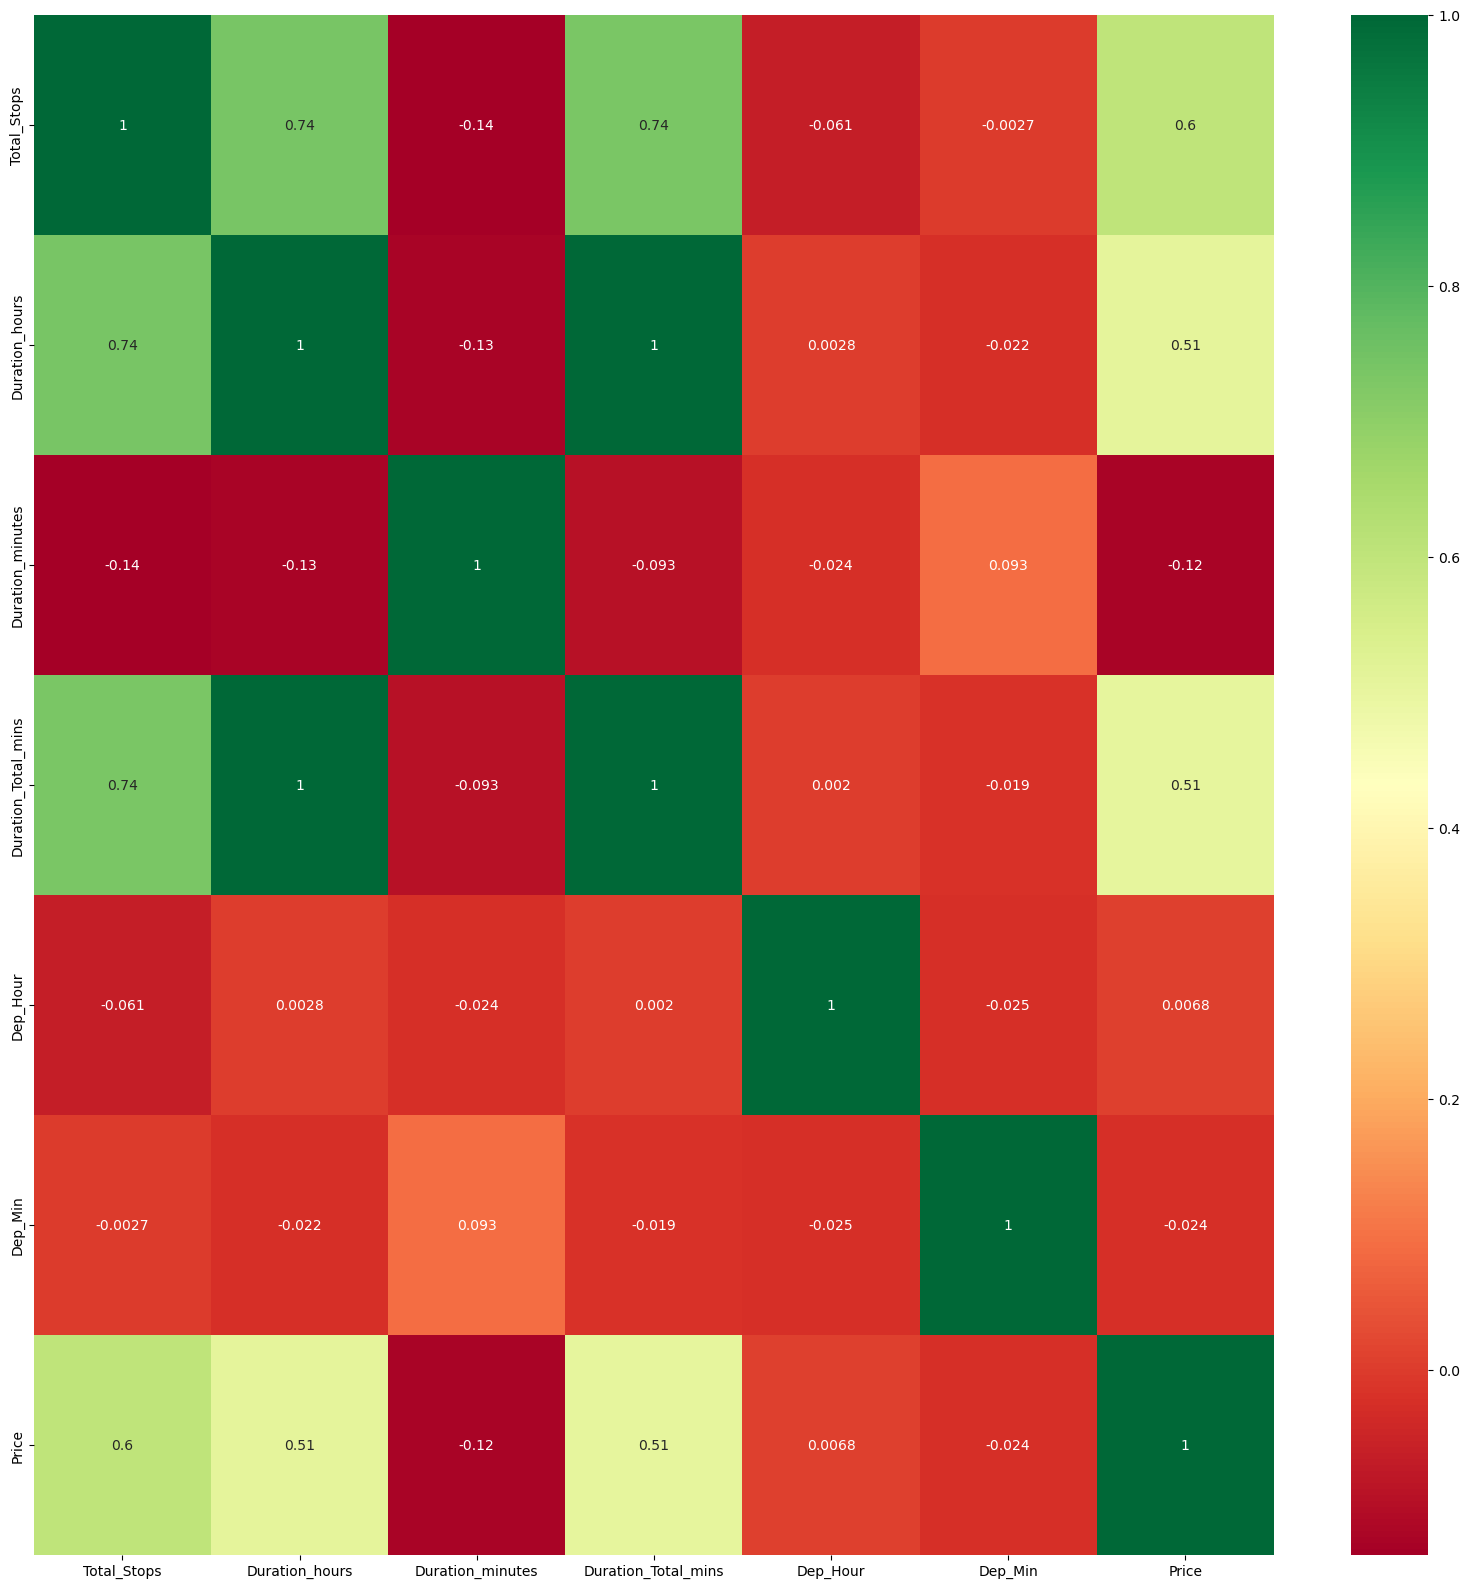

In [84]:
# constructing a heapmap to find the correlation between variables
plt.figure(figsize=(20,20))

numeric_data = new_data.select_dtypes('int','float')

# Constructing a heatmap to find the correlation between variables

sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn')
plt.show()



In [85]:
# Calculating correltion between all independent variable and price
features = numeric_data.corr()['Price'].sort_values()
features

Duration_minutes      -0.124874
Dep_Min               -0.024492
Dep_Hour               0.006819
Duration_Total_mins    0.506371
Duration_hours         0.508672
Total_Stops            0.603891
Price                  1.000000
Name: Price, dtype: float64

<Axes: >

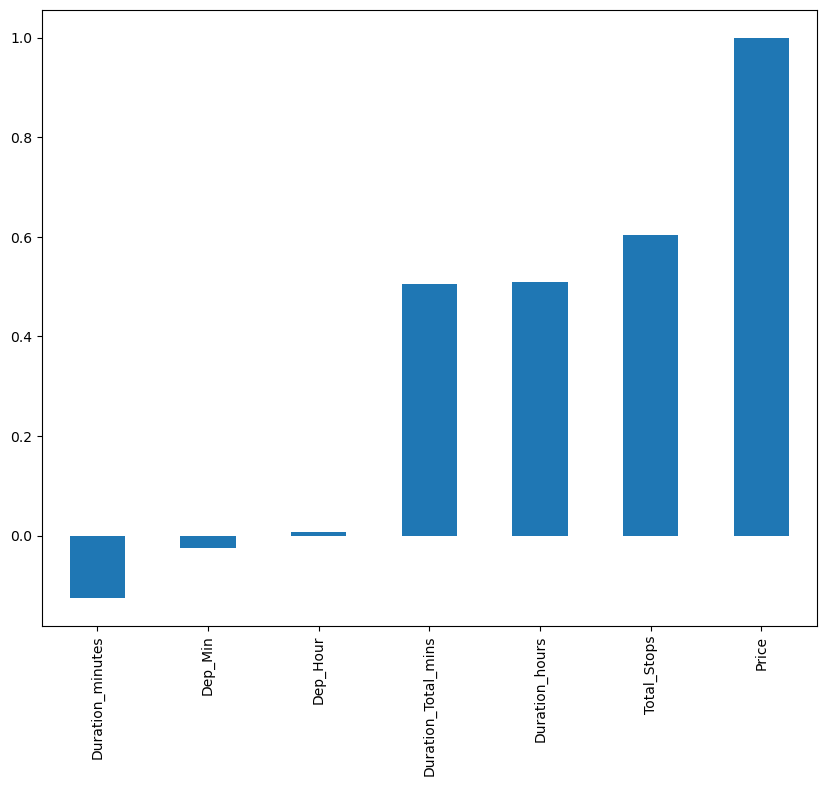

In [86]:
features.plot(kind='bar',figsize=(10,8))